In [1]:
#import libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#save data to dataframe
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [3]:
#Simple Linear Regression
'''Metode untuk mengetahui hubungan antara dua variabel,
dependen (response) dengan independen (predictor)'''
from sklearn.linear_model import LinearRegressiongression

In [4]:
#objek Linear Regression
lm = LinearRegression()

In [5]:
'''mengetahui hubungan antara variabel highway-mpg dengan price'''
X = df[['highway-mpg']]
y = df [['price']]

'''Fit X dan y dengan model'''
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [6]:
'''Prediksi dari model terhadap data baru'''
Yhat = lm.predict(X)
Yhat[0:5]

array([[16236.50464347],
       [16236.50464347],
       [17058.23802179],
       [13771.3045085 ],
       [20345.17153508]])

In [7]:
#nilai dari intercept (a)
lm.intercept_

array([38423.30585816])

In [8]:
#nilai dari slope (b)
lm.coef_

array([[-821.73337832]])

In [11]:
#Object LR baru
lm1= LinearRegression()

In [12]:
'''Train model dengan engine-size sebagai predictor'''
X1 = df[['engine-size']]
lm1.fit(X1,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
print (lm.intercept_)
print("\n", lm.coef_)

[-7963.33890628]

 [[166.86001569]]


In [21]:
#Multi Linear Regression
#Menggunakan lebih dari satu variabel sebagai predictor
#Kasus ini menggunakan horsepower, curb-weight,engine-size
#highway-mpg
Z = df[['horsepower', 'curb-weight', 'engine-size','highway-mpg']]

In [22]:
lm.fit(Z,df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [23]:
lm.intercept_

-15806.624626329234

In [24]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [26]:
'''Model Baru Multi Linear Regression'''
lm2 = LinearRegression()

Z2 = df[['normalized-losses', 'highway-mpg']]

lm2.fit(Z2, df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [27]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [28]:
#Visualisasi
import seaborn as sns
%matplotlib inline

(0, 48279.60083794194)

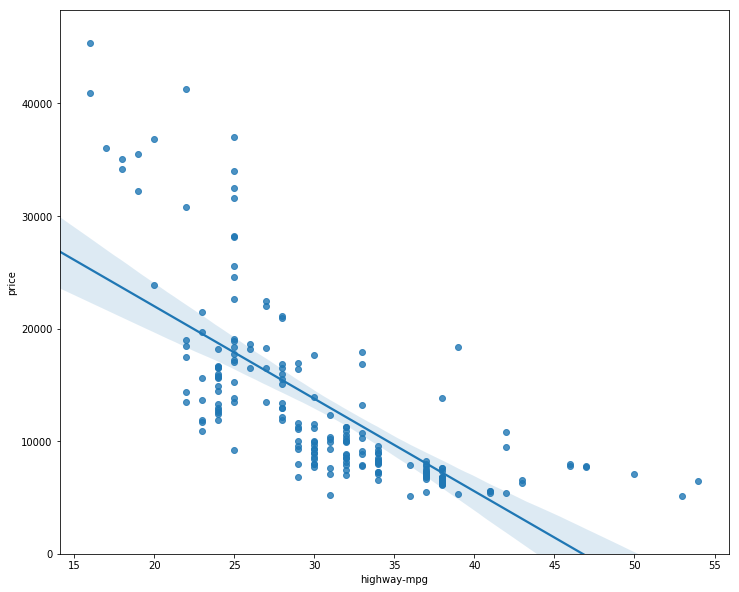

In [29]:
'''Regression Plot'''
plt.figure (figsize=(12,10))
sns.regplot(x='highway-mpg',y='price', data=df)
plt.ylim(0,)

(0, 47422.919330307624)

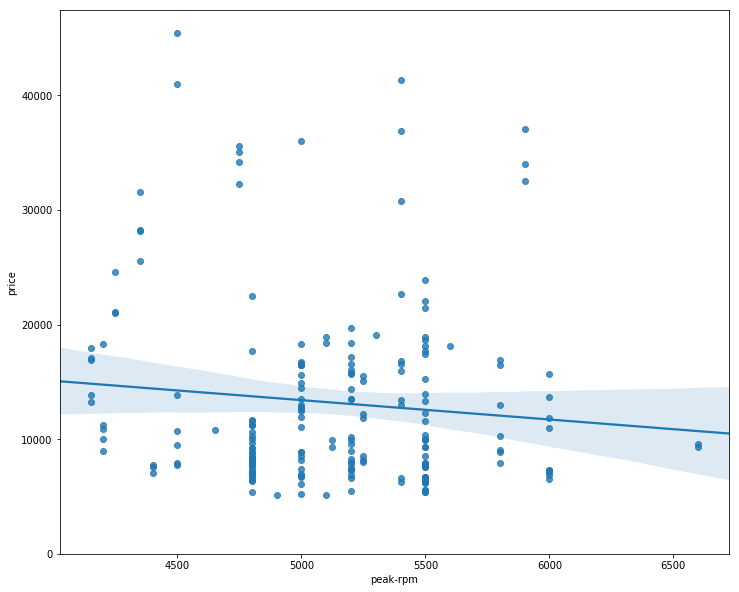

In [30]:
plt.figure (figsize=(12,10))
sns.regplot(x='peak-rpm',y='price', data=df)
plt.ylim(0,)

In [31]:
df[['peak-rpm','highway-mpg','price']].corr()

'''highway-mpg memiliki nilai korelasi yang paling tinggi dengan
price'''

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


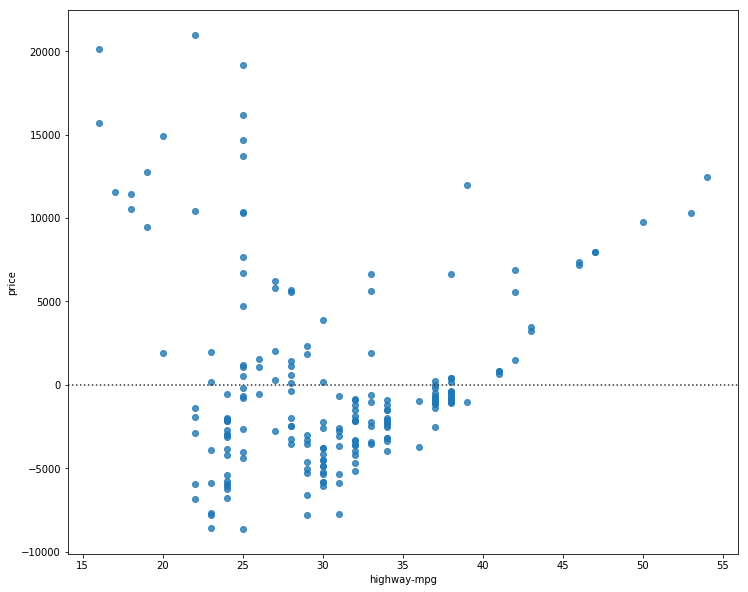

In [32]:
plt.figure (figsize=(12,10))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

In [33]:
'''Visualisasi Multiple Linear Regression
menggunakan distribution plot'''

Yhat = lm.predict(Z)

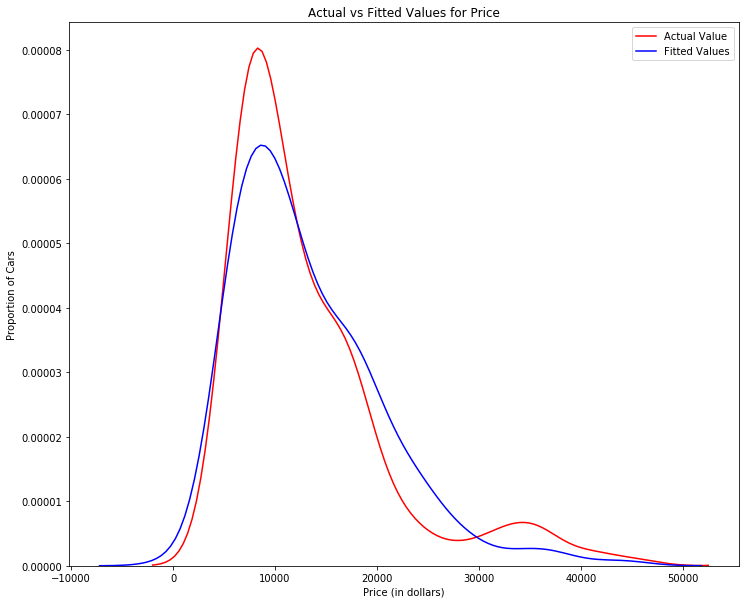

In [34]:
plt.figure(figsize=(12, 10))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [35]:
'''Polynomial Regression'''
#fungsi untuk visualisasi
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [36]:
x = df['highway-mpg']
y = df['price']

In [37]:
#menggunakan polynomial orde 3
f = np.polyfit(x,y,3)
p = np.poly1d(f)
p

poly1d([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

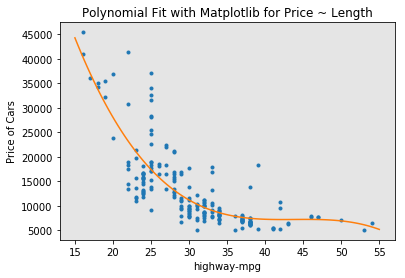

In [38]:
PlotPolly(p,x,y,'highway-mpg')

In [39]:
'''Membuat dengan orde 11'''
f1 = np.polyfit(x,y,11)
p1 = np.poly1d(f1)
p1

poly1d([-1.24263391e-08,  4.72184891e-06, -8.02843480e-04,  8.05640301e-02,
       -5.29740979e+00,  2.39470328e+02, -7.58845736e+03,  1.68447253e+05,
       -2.56531151e+06,  2.55140621e+07, -1.49106963e+08,  3.87930084e+08])

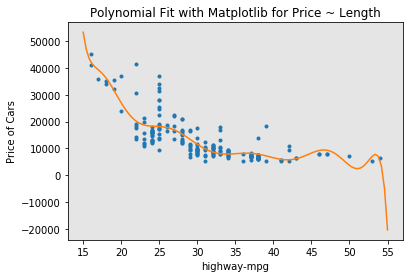

In [40]:
PlotPolly(p1,x,y,'highway-mpg')

In [41]:
from sklearn.preprocessing import PolynomialFeatures

In [42]:
pr = PolynomialFeatures(degree=2)

In [43]:
Z_pr = pr.fit_transform(Z)

In [44]:
Z.shape

(201, 4)

In [45]:
Z_pr.shape

(201, 15)

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [47]:
Input= [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]

In [48]:
pipe = Pipeline(Input)
pipe

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [49]:
pipe.fit(Z,y)

C:\Users\Muhsin Ahadi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Muhsin Ahadi\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [50]:
ypipe = pipe.predict(Z)
ypipe[0:4]

C:\Users\Muhsin Ahadi\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [51]:
'''Measures forIn-Sample Evaluation'''
'''R Squared
untuk Linear Regression'''
lm.fit(X, y)
print ('Nilai R-Square : ', lm.score(X,y))

Nilai R-Square :  0.4965911884339176


In [52]:
Yhat = lm.predict(X)
print ('Prediksi: ', Yhat[0:4])

Prediksi:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [53]:
from sklearn.metrics import mean_squared_error

In [54]:
mse = mean_squared_error(df['price'], Yhat)
print(mse)

31635042.944639888


In [55]:
'''Untuk Multi Linear Regression'''
lm.fit (Z, df['price'])
print('R^2 : ', lm.score(Z, df['price']))

R^2 :  0.8093562806577457


In [56]:
y_predict_multi = lm.predict(Z)
print ('MSE: ', mean_squared_error(df['price'], y_predict_multi))

MSE:  11980366.87072649


In [57]:
from sklearn.metrics import r2_score

In [58]:
r_squared = r2_score(y,p(x))
print ('Nilai R^2: ', r_squared)

Nilai R^2:  0.674194666390652


In [59]:
mean_squared_error(df['price'], p(x))

20474146.426361218

In [61]:
'''New Input'''
new_input=np.arange(1,100,1).reshape(-1,1)

In [62]:
lm.fit(X,y)
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [63]:
yhat = lm.predict(new_input)
yhat[0:5]

array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

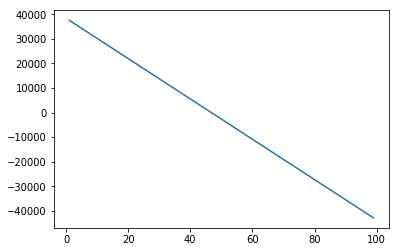

In [64]:
plt.plot(new_input, yhat)
plt.show()

In [ ]:
'''Model yang bagus adalah yang memiliki nilai R-Square terbesar
dan MSE terkecil'''